In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as f # for activation function
from torch.optim import SGD # the schostic to sue in training
import matplotlib.pyplot as plt
import seaborn as sns

**first nn** to build your nn in torch you need to define a class for your nn


In [10]:
class firstNnn(nn.Module):    # now its a class with nn properties
    # now we define init
    def __init__(self):
        super().__init__()
        # need to define all place holders in our nn
        # tesnor is the value that nn can apply trainign algo on
        #self.w00=nn.Parameter(torch.tensor(1.1),requires_grad= False) # self.w00=1.1
        #self.w01=nn.Parameter(torch.tensor(0.6), requires_grad=False) # requird grad mean i want it constant and not to change during gradient and training
        self.w00 = nn.Parameter( torch.tensor(1.1), requires_grad=False ) # self.w00 = 1.1
        self.b00 = nn.Parameter(torch.tensor(-0.5), requires_grad=False)

        self.w01 = nn.Parameter(torch.tensor(0.6), requires_grad=False)
        self.b01 = nn.Parameter(torch.tensor(-1.5), requires_grad=False)

        self.w02 = nn.Parameter(torch.tensor(0.5), requires_grad=False)
        self.b02 = nn.Parameter(torch.tensor(0.65), requires_grad=False)

        self.w11 = nn.Parameter(torch.tensor(1.55), requires_grad=False)
        self.w12 = nn.Parameter(torch.tensor(-0.7), requires_grad=False)
        self.w13 = nn.Parameter(torch.tensor(1.22), requires_grad=False)

        self.w20= nn.Parameter(torch.tensor(2.4), requires_grad=False)


##    def forward(self,x):  # x is input
    def forward(self,input):
        # this iS A nueron inside a layer
        input_to_layer_01= input*self.w00 + self.b00
        layer_01_output= f.relu(input_to_layer_01)
        layer_01_output= layer_01_output* self.w11

        # second neuron in layer 1
        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = f.relu(input_to_layer_02)
        layer_02_output = layer_02_output * self.w12
        # third neuron in layer 1
        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = f.relu(input_to_layer_03)
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output
        output= f.tanh(output)

        return output

        


In [11]:
first_model= firstNnn()


In [15]:
true_inputs= torch.linspace(1, 2.5,steps=40)
true_inputs

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

In [16]:
true_outputs= first_model(true_inputs)
true_outputs

tensor([0.9814, 0.9844, 0.9869, 0.9890, 0.9908, 0.9923, 0.9936, 0.9946, 0.9955,
        0.9962, 0.9968, 0.9973, 0.9978, 0.9981, 0.9984, 0.9987, 0.9989, 0.9991,
        0.9992, 0.9994, 0.9995, 0.9996, 0.9996, 0.9997, 0.9997, 0.9998, 0.9998,
        0.9998, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000])

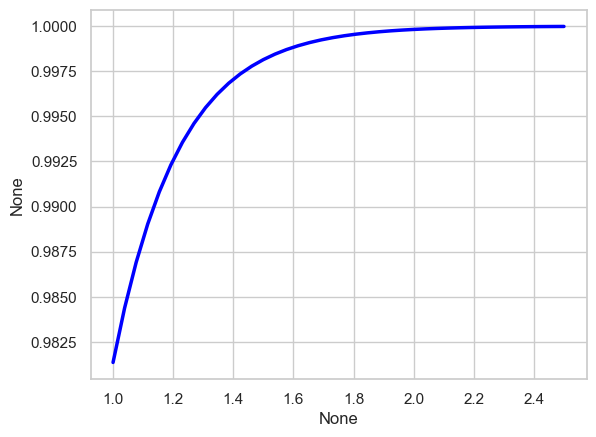

In [17]:
sns.set_theme(style="whitegrid")
sns.lineplot(
    x=true_inputs,
    y=true_outputs,
    color='blue',
    linewidth=2.5
)
plt.show()

**here we set some required-grad = true to train and optimize them**

In [23]:
class PlainFirstNN(nn.Module):

    def __init__(self):

        super().__init__()

        self.w00 = nn.Parameter( torch.tensor(0.0), requires_grad=True )
        self.b00 = nn.Parameter(torch.tensor(-0.5), requires_grad=False)

        self.w01 = nn.Parameter(torch.tensor(0.6), requires_grad=False)
        self.b01 = nn.Parameter(torch.tensor(-1.5), requires_grad=False)

        self.w02 = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        self.b02 = nn.Parameter(torch.tensor(0.65), requires_grad=False)

        self.w11 = nn.Parameter(torch.tensor(1.55), requires_grad=False)
        self.w12 = nn.Parameter(torch.tensor(-0.7), requires_grad=False)
        self.w13 = nn.Parameter(torch.tensor(1.22), requires_grad=False)

        self.w20 = nn.Parameter(torch.tensor(0.0), requires_grad=True)
    def forward(self, input):

        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = f.relu(input_to_layer_01)
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = f.relu(input_to_layer_02)
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = f.relu(input_to_layer_03)
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = f.tanh(output)
        output = output * self.w20

        return output

In [24]:
PlainFirstNN_1 = PlainFirstNN()
PlainFirstNN_1(true_inputs)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<MulBackward0>)

**here we want to train the data on the on to reach the predicted values which is the values we got from first nn**


In [25]:
# define the optimizer
optimizer = SGD(PlainFirstNN_1.parameters(), lr=0.01)
# the loss function
loss= nn.MSELoss()

In [26]:
for epoch in range(100):

    total_loss = 0

    for i in range(len(true_inputs)):

        input_i = true_inputs[i]
        true_output_i = true_outputs[i]

        pred_output_i = PlainFirstNN_1(input_i)

        loss_value = loss(pred_output_i, true_output_i)

        loss_value.backward()

        total_loss += loss_value

    print("Epoch:", epoch, " | Total Loss:", total_loss)

    optimizer.step()
    # here the optimizer allocate numbers to the parameters based on the  previous gradients
    # so we use zero_grad to reset the gradients to zero before next epoch
    optimizer.zero_grad()

Epoch: 0  | Total Loss: tensor(39.7718, grad_fn=<AddBackward0>)
Epoch: 1  | Total Loss: tensor(16.8770, grad_fn=<AddBackward0>)
Epoch: 2  | Total Loss: tensor(1.8748, grad_fn=<AddBackward0>)
Epoch: 3  | Total Loss: tensor(0.1645, grad_fn=<AddBackward0>)
Epoch: 4  | Total Loss: tensor(0.0442, grad_fn=<AddBackward0>)
Epoch: 5  | Total Loss: tensor(0.0366, grad_fn=<AddBackward0>)
Epoch: 6  | Total Loss: tensor(0.0360, grad_fn=<AddBackward0>)
Epoch: 7  | Total Loss: tensor(0.0359, grad_fn=<AddBackward0>)
Epoch: 8  | Total Loss: tensor(0.0357, grad_fn=<AddBackward0>)
Epoch: 9  | Total Loss: tensor(0.0356, grad_fn=<AddBackward0>)
Epoch: 10  | Total Loss: tensor(0.0354, grad_fn=<AddBackward0>)
Epoch: 11  | Total Loss: tensor(0.0353, grad_fn=<AddBackward0>)
Epoch: 12  | Total Loss: tensor(0.0352, grad_fn=<AddBackward0>)
Epoch: 13  | Total Loss: tensor(0.0350, grad_fn=<AddBackward0>)
Epoch: 14  | Total Loss: tensor(0.0349, grad_fn=<AddBackward0>)
Epoch: 15  | Total Loss: tensor(0.0348, grad_fn=

In [27]:
pred= PlainFirstNN_1(true_inputs)

<Axes: xlabel='None', ylabel='None'>

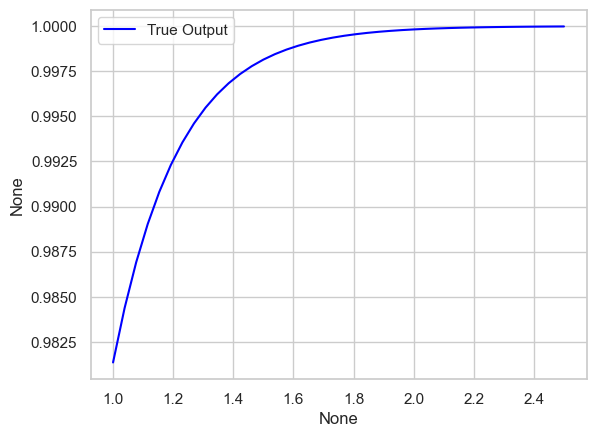

In [ ]:
# here detach used for the parameters that their req grad = truewe
sns.lineplot(x=true_inputs,
             y=true_outputs.detach(),color='blue',label='True Output')